<p style="text-align: center;"> <span style="color:skyblue"> <font size="5"> <b> CNN Neural Network - Image Classification  </b> </font> </p> </span> 
<p style="text-align: center;"> <b> <font font size="4"> By: Kofi Buahin </p> </b></font>

## Library Imports  

In [73]:
import os
import pathlib
import pickle
import warnings
warnings.filterwarnings('ignore')


#Standard Data Science Libraries
import numpy as np
import pandas as pd

#Image Processing Relevant Tools
from PIL import Image, ImageOps
from IPython.display import display

# Machine Learning Relevant Tools
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns 
plt.style.use('ggplot')
rcParams['figure.figsize'] = (18, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

## Data Pre-processing

In [74]:
dir = str(pathlib.Path().resolve())
image_classes = [folder for folder in os.listdir(dir+'/natural_images') ]
image_classes

['cat', 'dog', 'person']

We don't have images of the same size so we should rescale them. We do that using functions below

In [75]:
# Containers for Numpy Arrays of Image data.
from pandas import value_counts


y_labels = []
x_data = []
val_counts = {}

# Function to Process images
def ImageProcessor(img_path):
    img = Image.open(img_path)
    img = img.resize(size=(32, 32))
    img = np.asarray(img)/ 255.0
    return img

# def FolderProcessor(label):
def FolderProcessor(label,lst):
    folder = dir + '/natural_images/{}'.format(label) 
    processed = [] # Storage container for images
    for img in os.listdir(folder): # For every image in the directory
        pic_dir = folder + '/{}'.format(img)
        processed.append(ImageProcessor(pic_dir))
        y_labels.append(label)  # Add a class column
    lst.append(processed) # Convert to pd.DataFrame
    return processed

#### Loading Data

We can now merge all the processed data into a single dataframe here:

In [ ]:
[FolderProcessor(c, x_data) for c in image_classes]

We must now split the dataset into test and train and we must also encode the target variable class

In [77]:
X_vars = np.concatenate(x_data, axis=0)
y_vars = np.array(y_labels)
print('X Data Shape: {}'.format(X_vars.shape))
print('Y Data Shape: {}'.format(y_vars.shape))

y_encoded = LabelEncoder().fit_transform(y_vars)
y_categorical = to_categorical(y_encoded)



X Data Shape: (2573, 32, 32, 3)
Y Data Shape: (2573,)


In [78]:
del x_data

In [79]:
shuffle = np.arange(X_vars.shape[0])
np.random.seed(15)
np.random.shuffle(shuffle)
X = X_vars[shuffle]
# X = np.array(X_vars[shuffle])
y = y_categorical[shuffle]


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## Model Building

### Iteration 1 - MLP Classifier

In [82]:
tf.random.set_seed(15)

mlp_nn = tf.keras.Sequential()
mlp_nn.add(layers.Flatten(input_shape=X_train.shape[1:]))
mlp_nn.add(layers.Dense(2048, activation='relu'))
mlp_nn.add(layers.Dense(1024, activation='relu'))
mlp_nn.add(layers.Dense(1024, activation='relu'))
mlp_nn.add(layers.Dropout(rate=0.25))
mlp_nn.add(layers.Dense(128, activation='relu'))
mlp_nn.add(layers.Dense(3, activation='softmax'))


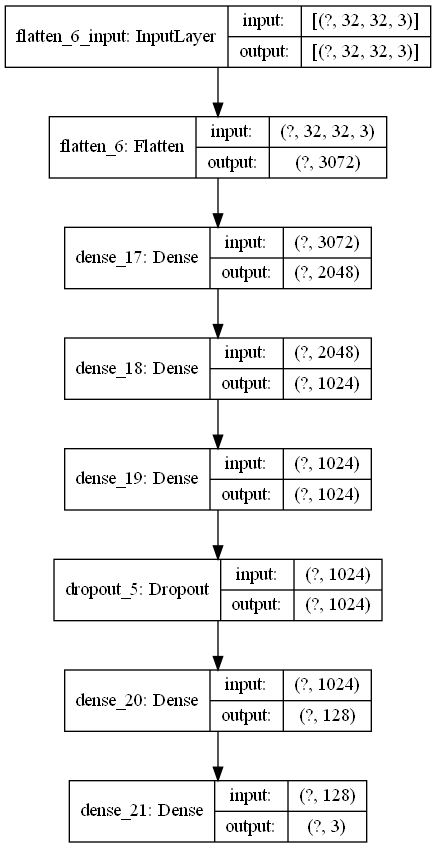

In [83]:
plot_model(mlp_nn, show_shapes = True,expand_nested = True)

In [84]:
mlp_nn.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_mlp = mlp_nn.fit(
    X_train,
    y_train,
    epochs=25,
    # batch_size=128,
    validation_split= 0.2,
    callbacks = early_stopping_cb
)

Epoch 1/25
45/45 [==============================] - 13s 292ms/step - loss: 1.2553 - accuracy: 0.6701 - val_loss: 0.8839 - val_accuracy: 0.7239
Epoch 2/25
45/45 [==============================] - 14s 318ms/step - loss: 0.6634 - accuracy: 0.7771 - val_loss: 0.5527 - val_accuracy: 0.8033
Epoch 3/25
45/45 [==============================] - 20s 441ms/step - loss: 0.5439 - accuracy: 0.8127 - val_loss: 0.4846 - val_accuracy: 0.8079
Epoch 4/25
45/45 [==============================] - 15s 331ms/step - loss: 0.5164 - accuracy: 0.8248 - val_loss: 0.4811 - val_accuracy: 0.8236
Epoch 5/25
45/45 [==============================] - 14s 318ms/step - loss: 0.5892 - accuracy: 0.8056 - val_loss: 0.7282 - val_accuracy: 0.7701
Epoch 6/25
45/45 [==============================] - 14s 319ms/step - loss: 0.5003 - accuracy: 0.8139 - val_loss: 0.4934 - val_accuracy: 0.8107
Epoch 7/25
45/45 [==============================] - 15s 325ms/step - loss: 0.4937 - accuracy: 0.8225 - val_loss: 0.4719 - val_accuracy: 0.8440

In [85]:
mlp_nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_21 (Dense)             (None, 3)                

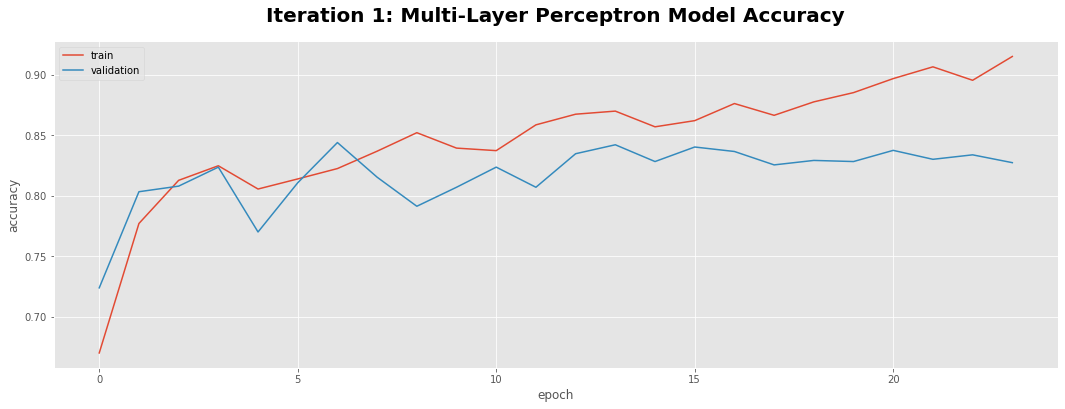

In [86]:
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title("Iteration 1: Multi-Layer Perceptron Model Accuracy", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


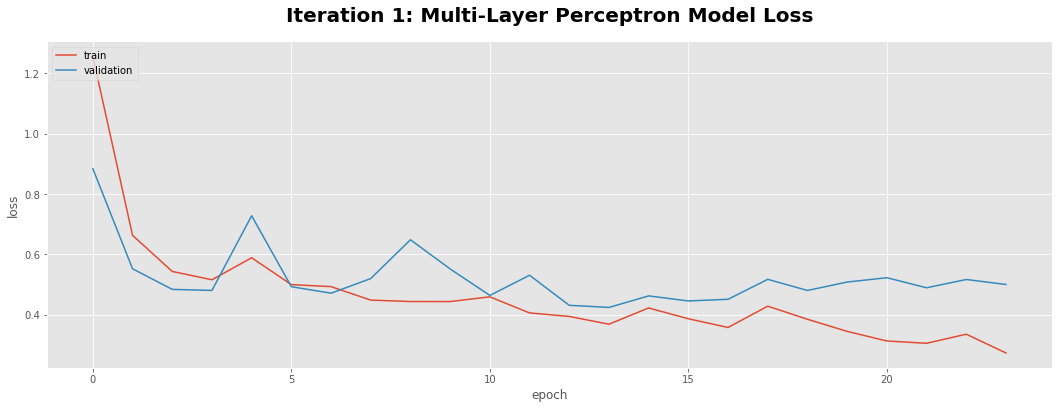

In [87]:
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title("Iteration 1: Multi-Layer Perceptron Model Loss", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [88]:
loss, accuracy = mlp_nn.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)


25/25 [==============================] - 1s 37ms/step - loss: 0.4658 - accuracy: 0.8364
Loss:  0.4658079445362091
Accuracy:  0.8363558053970337


In [89]:
y_pred = np.argmax(mlp_nn.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
round(accuracy_score(y_pred,y_test2),4)

0.75

In [90]:
y_pred = np.argmax(mlp_nn.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       269
           1       0.57      0.55      0.56       216
           2       0.96      0.98      0.97       287

    accuracy                           0.75       772
   macro avg       0.73      0.73      0.73       772
weighted avg       0.75      0.75      0.75       772



We can see the performance (precision) on the human images is significantly better on people faces versus dogs and cats....

elaborate more here

In [91]:
X_train.shape[1:]

(32, 32, 3)

### Iteration 2 - Basic Custom CNN Network Architecture

In [92]:
CNN_basic = keras.models.Sequential([
    keras.layers.Conv2D(32, 5, activation="relu",input_shape=X_train.shape[1:], padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(64, 3, activation="relu",padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(128, 3, activation="relu",padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Dropout(0.3),

    keras.layers.Flatten(),
    
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(3, activation="softmax")
])

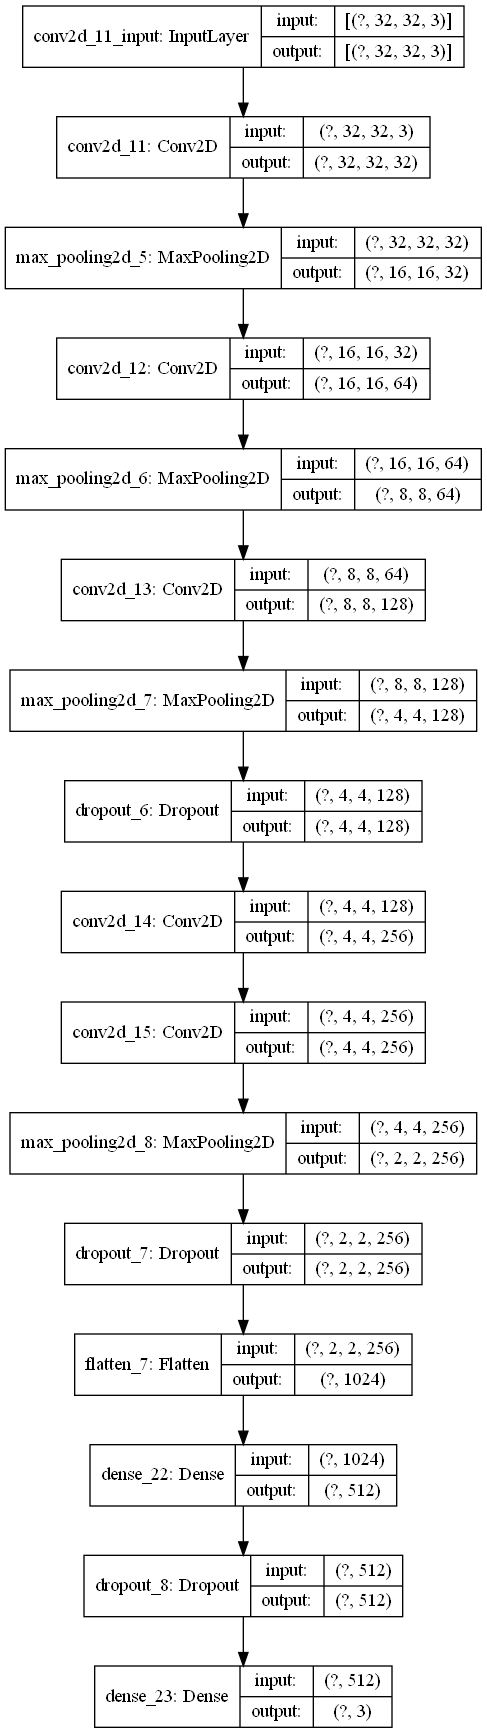

In [93]:
plot_model(CNN_basic, show_shapes = True,expand_nested = True)

In [94]:
CNN_basic.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [95]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_CNNbasic = CNN_basic.fit(
    X_train,
    y_train,
    epochs=25,
    # batch_size=128,
    validation_split= 0.2,
    callbacks = early_stopping_cb
)

Epoch 1/25
45/45 [==============================] - 23s 511ms/step - loss: 0.9896 - accuracy: 0.7069 - val_loss: 0.8503 - val_accuracy: 0.7535
Epoch 2/25
45/45 [==============================] - 21s 476ms/step - loss: 0.7226 - accuracy: 0.7762 - val_loss: 0.6185 - val_accuracy: 0.7858
Epoch 3/25
45/45 [==============================] - 21s 470ms/step - loss: 0.5787 - accuracy: 0.8044 - val_loss: 0.5061 - val_accuracy: 0.7692
Epoch 4/25
45/45 [==============================] - 21s 475ms/step - loss: 0.5100 - accuracy: 0.8171 - val_loss: 0.5154 - val_accuracy: 0.7978
Epoch 5/25
45/45 [==============================] - 16s 351ms/step - loss: 0.4872 - accuracy: 0.8222 - val_loss: 0.4993 - val_accuracy: 0.8218
Epoch 6/25
45/45 [==============================] - 17s 374ms/step - loss: 0.4504 - accuracy: 0.8421 - val_loss: 0.4793 - val_accuracy: 0.8218
Epoch 7/25
45/45 [==============================] - 17s 367ms/step - loss: 0.4412 - accuracy: 0.8514 - val_loss: 0.4413 - val_accuracy: 0.8366

In [96]:
CNN_basic.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 128)        

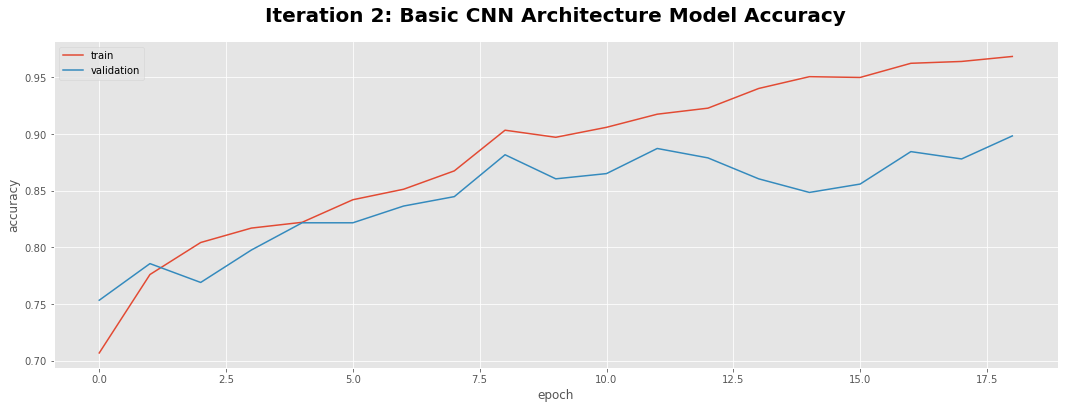

In [97]:
plt.plot(history_CNNbasic.history['accuracy'])
plt.plot(history_CNNbasic.history['val_accuracy'])
plt.title("Iteration 2: Basic CNN Architecture Model Accuracy", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

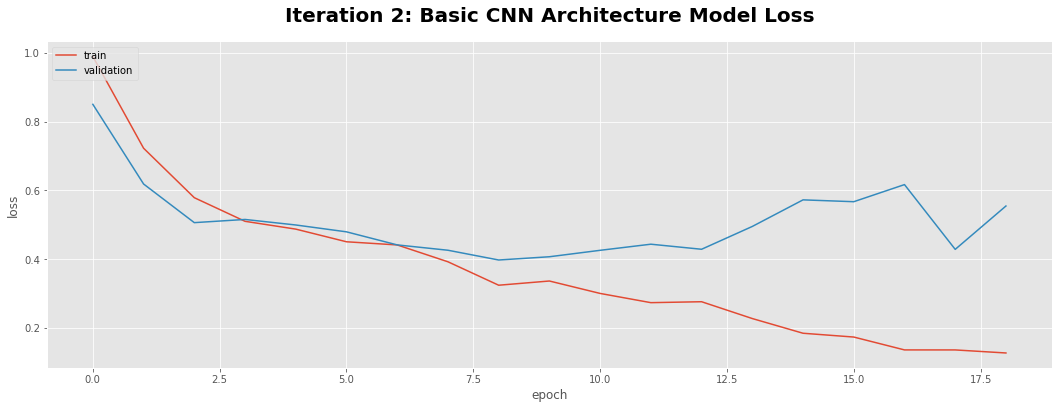

In [98]:
plt.plot(history_CNNbasic.history['loss'])
plt.plot(history_CNNbasic.history['val_loss'])
plt.title("Iteration 2: Basic CNN Architecture Model Loss", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [99]:
loss, accuracy = CNN_basic.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)


25/25 [==============================] - 1s 54ms/step - loss: 0.3648 - accuracy: 0.8864
Loss:  0.36483150720596313
Accuracy:  0.8864420652389526


In [100]:
y_pred = np.argmax(CNN_basic.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
round(accuracy_score(y_pred,y_test2),4)

0.829

In [101]:
# y_pred = np.argmax(mlp_nn.predict(X_test), axis=1)
# y_test2 = np.argmax(y_test, axis = 1)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       269
           1       0.71      0.68      0.69       216
           2       0.99      0.98      0.98       287

    accuracy                           0.83       772
   macro avg       0.82      0.82      0.82       772
weighted avg       0.83      0.83      0.83       772



### Iteration 3 - Implementing Recreation of a Popular Architecture (AlexNet)

In [125]:
AlexNet = keras.models.Sequential([
    keras.layers.Conv2D(96, kernel_size=(11,11), activation="relu", input_shape=X_train.shape[1:], strides=(4,4), padding="valid"), #C1 Layer 
    # tf.keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.MaxPooling2D(strides=2,padding='valid'),                                                                           #S2 Layer

    keras.layers.Conv2D(256, kernel_size=(5,5), activation="relu", strides=1, padding="same"),                                      #C3 Layer
    # tf.keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.MaxPooling2D(strides=2, padding='valid'),                                                                          #S4 Layer

    keras.layers.Conv2D(384, kernel_size=(3,3), activation="relu", strides=1, padding="same"),                                      #C5 Layer
    # tf.keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    

    keras.layers.Conv2D(384, kernel_size=(3,3), activation="relu", strides=1, padding="same"),                                      #C6 Layer
    # tf.keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(256, kernel_size=(3,3), activation="relu", strides=1, padding="same"),                                      #C7 Layer
    # tf.keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),                                                                                                         #Flatten 

    keras.layers.Dense(4096, activation="relu"),                                                                                    #F8 Layer
    keras.layers.Dense(4096, activation="relu"),                                                                                    #F9 Layer
    keras.layers.Dropout(0.4),

    
    keras.layers.Dense(3, activation="softmax")                                                                                     #Output Layer
])

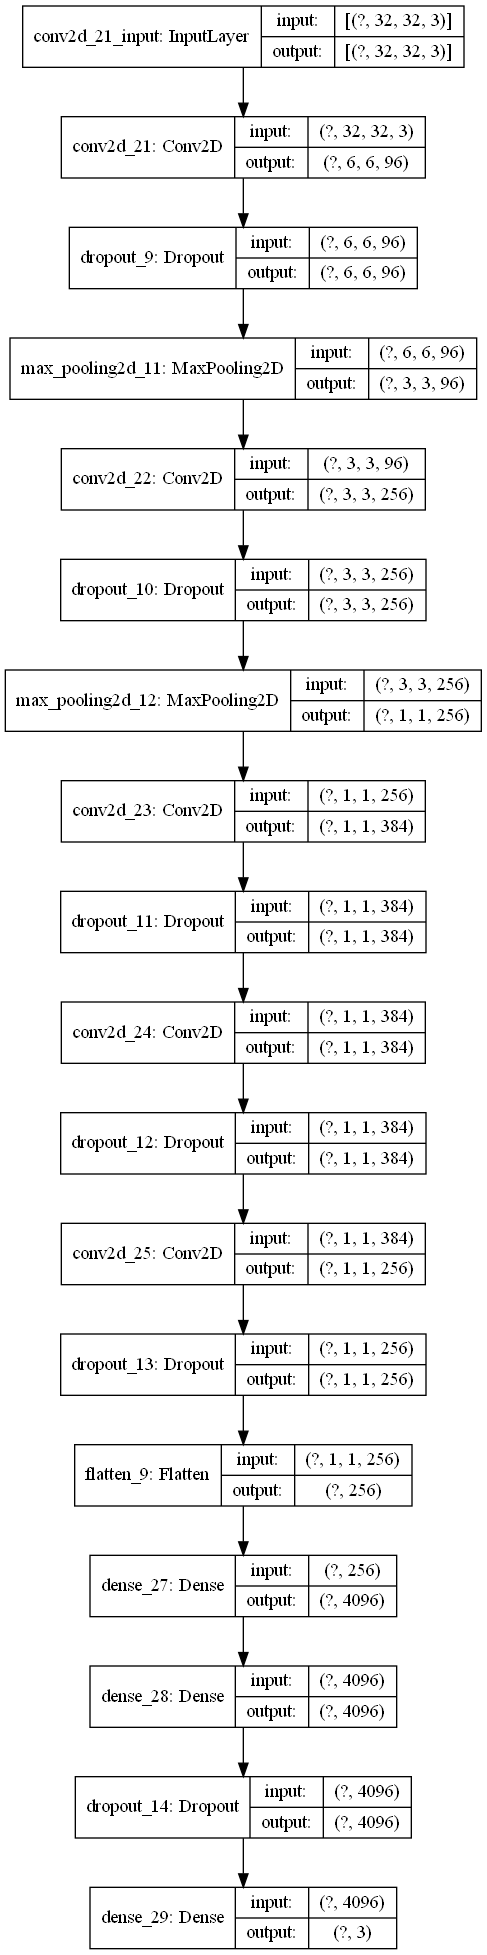

In [126]:
plot_model(AlexNet, show_shapes = True,expand_nested = True)

In [127]:
AlexNet.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [128]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_AlexNet = AlexNet.fit(
    X_train,
    y_train,
    epochs=25,
    # batch_size=128,
    validation_split= 0.2,
    callbacks = early_stopping_cb
)

Epoch 1/25
45/45 [==============================] - 64s 1s/step - loss: 1.0045 - accuracy: 0.7000 - val_loss: 0.8498 - val_accuracy: 0.7516
Epoch 2/25
45/45 [==============================] - 47s 1s/step - loss: 0.6732 - accuracy: 0.7926 - val_loss: 0.6403 - val_accuracy: 0.7969
Epoch 3/25
45/45 [==============================] - 47s 1s/step - loss: 0.6021 - accuracy: 0.8014 - val_loss: 0.5115 - val_accuracy: 0.7682
Epoch 4/25
45/45 [==============================] - 47s 1s/step - loss: 0.5752 - accuracy: 0.7986 - val_loss: 0.5159 - val_accuracy: 0.8006
Epoch 5/25
45/45 [==============================] - 46s 1s/step - loss: 0.5161 - accuracy: 0.8130 - val_loss: 0.5027 - val_accuracy: 0.8015
Epoch 6/25
45/45 [==============================] - 47s 1s/step - loss: 0.4913 - accuracy: 0.8231 - val_loss: 0.4806 - val_accuracy: 0.8172
Epoch 7/25
45/45 [==============================] - 49s 1s/step - loss: 0.4892 - accuracy: 0.8176 - val_loss: 0.5318 - val_accuracy: 0.8089
Epoch 8/25
45/45 [==

In [129]:
AlexNet.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 6, 6, 96)          34944     
_________________________________________________________________
dropout_9 (Dropout)          (None, 6, 6, 96)          0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 96)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 3, 3, 256)         614656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 3, 3, 256)         0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 256)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 1, 1, 384)        

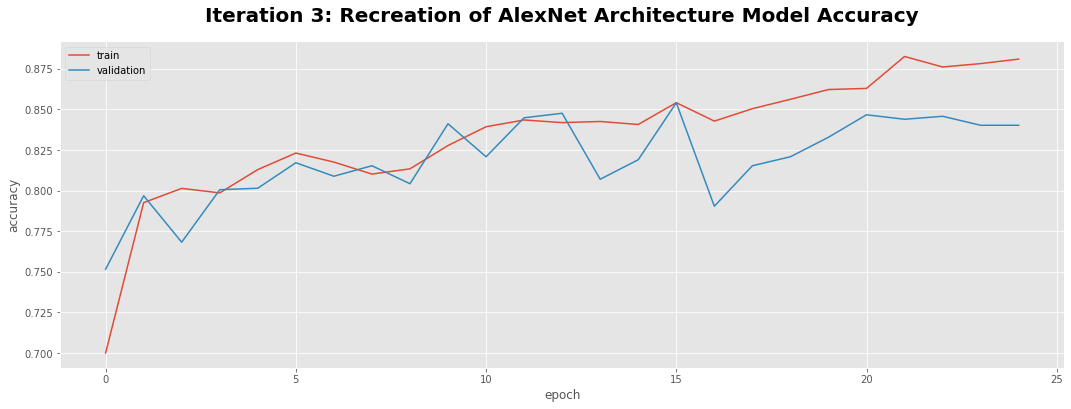

In [130]:
plt.plot(history_AlexNet.history['accuracy'])
plt.plot(history_AlexNet.history['val_accuracy'])
plt.title("Iteration 3: Recreation of AlexNet Architecture Model Accuracy", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

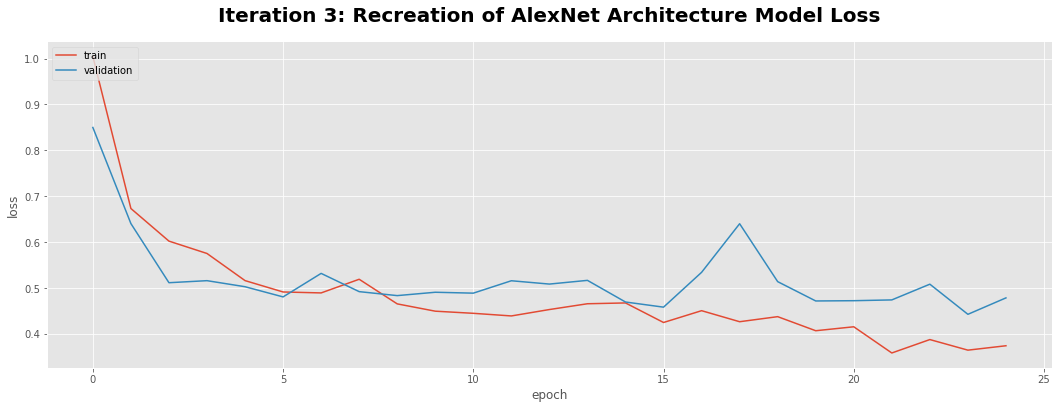

In [131]:
plt.plot(history_AlexNet.history['loss'])
plt.plot(history_AlexNet.history['val_loss'])
plt.title("Iteration 3: Recreation of AlexNet Architecture Model Loss", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [132]:
loss, accuracy = AlexNet.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)

25/25 [==============================] - 1s 58ms/step - loss: 0.5064 - accuracy: 0.8372
Loss:  0.5064095854759216
Accuracy:  0.8372192978858948


In [133]:
y_pred = np.argmax(AlexNet.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
round(accuracy_score(y_pred,y_test2),4)

0.7539

In [134]:
y_pred = np.argmax(AlexNet.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.54      0.61       269
           1       0.55      0.73      0.63       216
           2       0.98      0.98      0.98       287

    accuracy                           0.75       772
   macro avg       0.75      0.75      0.74       772
weighted avg       0.77      0.75      0.75       772



## Final Predictions: Dataset of (Un)Familiar Faces

- highlight how you have compiled dataset with some close people in your life
- Introduce them in the current setting
- make predictive model
- 

In [418]:
friend_path = []
category = []
filename = []
friend_name = []
Id = list(range(1,21,1))

for c in image_classes:
    folder_path = dir + '/prediction_images/{}'.format(c)
    for img in os.listdir(folder_path):
        filename.append(img)
        img_path = folder_path + '/{}'.format(img)
        friend_path.append(img_path)
        category.append(c)
        # picture_data = 
    del c,img,img_path,folder_path

friend_df = pd.DataFrame(data={'Id':Id,
                               'image_path':friend_path,
                               'filename':filename,
                               'category':category})
# friend_df


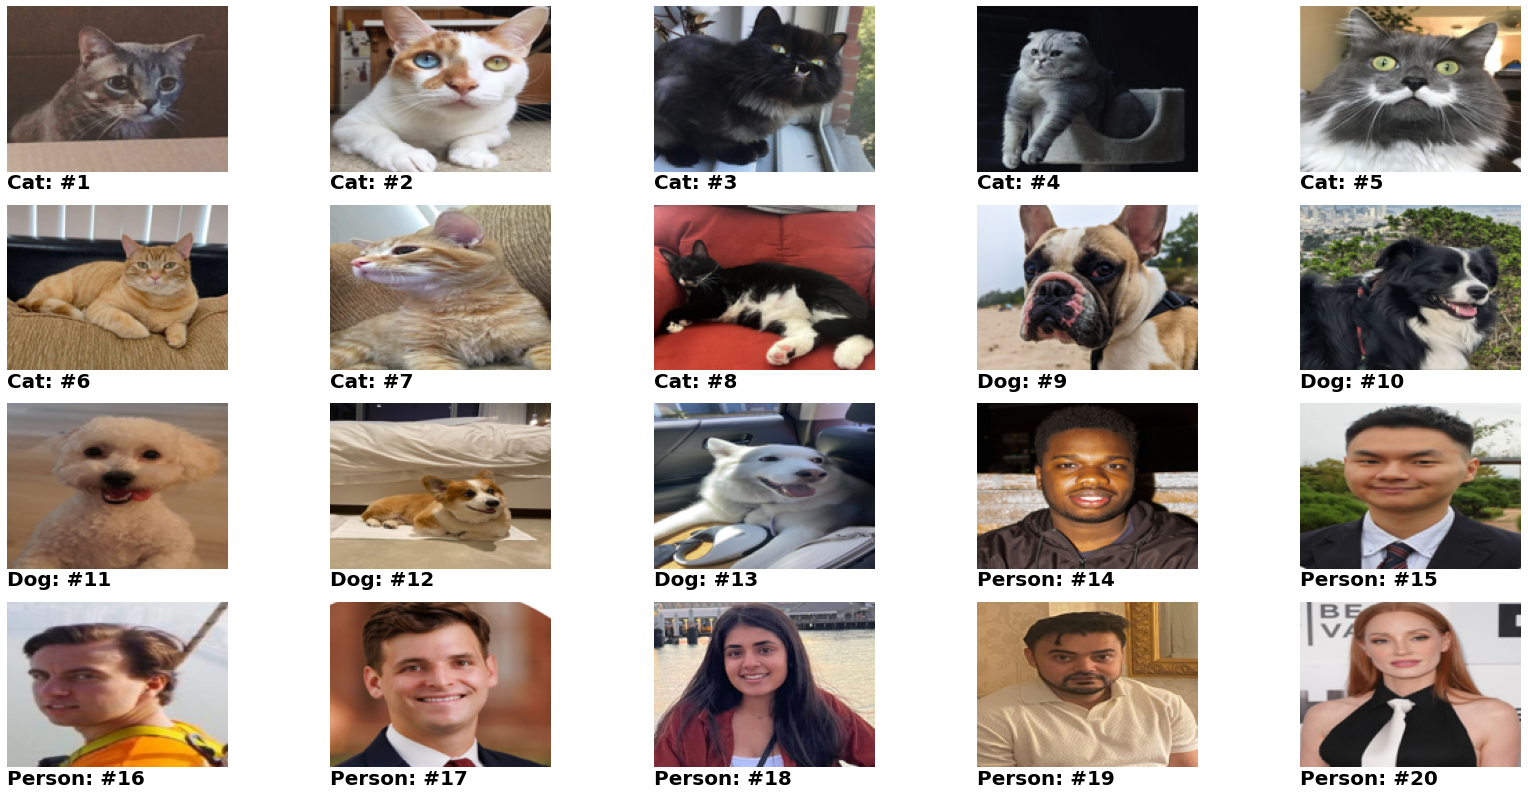

In [419]:
plt.figure(figsize=(28,14))

for i, img_path in enumerate(friend_df['image_path']):
    header = "{}: #{}".format(str.capitalize(friend_df['category'][i]),str(i + 1)) 
    ax = plt.subplot(4, 5, i+1)
    ax.axis('off')
    img = Image.open(img_path).resize(size=(160,120))
    plt.imshow(img)
    ax.text(0, -0.1,header, transform=ax.transAxes,size=20,color='black', weight='bold')
    # plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)


In [420]:
valid_labels = []
valid_data = []

for i, path in enumerate(friend_df['image_path']):
    pic_data = ImageProcessor(path)
    l = friend_df['category'][i]
    valid_labels.append(l)
    valid_data.append(pic_data)
    del pic_data, l

In [421]:
X_valid = np.array(valid_data)
y_valid = np.array(valid_labels)
print('Friend Picture Data Shape: {}'.format(X_valid.shape))
print('Friend Class Data Shape: {}'.format(y_valid.shape))
print(y_valid)

Friend Picture Data Shape: (20, 32, 32, 3)
Friend Class Data Shape: (20,)
['cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog'
 'dog' 'person' 'person' 'person' 'person' 'person' 'person' 'person']


In [422]:
le = LabelEncoder()
y_answers = le.fit_transform(y_valid)
y_answers_cat  = to_categorical(y_answers)

In [423]:
shuffle = np.arange(X_valid.shape[0])
np.random.seed(15)
np.random.shuffle(shuffle)
X_ = X_valid[shuffle]
y_ = y_answers_cat[shuffle]
friend_classes_enc = np.argmax(y_, axis = 1)

Predictions with MLP Artificial Neural Network

In [424]:
def PredictionProcessesor(model, xvars=X_, pred_order=shuffle):
    preds = np.argmax(model.predict(xvars), axis=1)

    og_df = friend_df.drop(columns=['filename'])
    ac_col = list(le.inverse_transform(friend_classes_enc))
    Id_pred = [id + 1 for id in pred_order]

    catp = []
    dogp = []
    humanp = []

    for x in model.predict(xvars):
    # print(round(x[0],3),round(x[1],3),round(x[2],3))
        catp.append(round(x[0],3)),
        dogp.append(round(x[1],3)),
        humanp.append(round(x[2],3))

    preds_df = pd.DataFrame({'Id':Id_pred, 
                          'ModelPrediction':le.inverse_transform(preds),
                          'ActualCategory':ac_col,
                          'Cat_Proba':catp,
                          'Dog_Proba':dogp,
                          'Person_Proba':humanp})

    preds_df['PredictionAccuracy'] = [1 if p == preds_df['ActualCategory'][i] else 0 for i, p in enumerate(preds_df['ModelPrediction']) ]
    result = og_df.merge(preds_df, left_on='Id',right_on='Id')
    
    return result


In [425]:
mlp_classpreds = np.argmax(mlp_nn.predict(X_), axis=1)
print("Accuracy Score:   {}%".format(round(accuracy_score(mlp_classpreds,friend_classes_enc),4)*100))
mlp_preds = PredictionProcessesor(mlp_nn)
mlp_preds

Accuracy Score:   55.00000000000001%


Id                                         image_path category  \
0    1  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
1    2  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
2    3  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
3    4  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
4    5  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
5    6  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
6    7  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
7    8  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
8    9  C:\Users\Young Harambe\Documents\USC MSBA Docu...      dog   
9   10  C:\Users\Young Harambe\Documents\USC MSBA Docu...      dog   
10  11  C:\Users\Young Harambe\Documents\USC MSBA Docu...      dog   
11  12  C:\Users\Young Harambe\Documents\USC MSBA Docu...      dog   
12  13  C:\Users\Young Harambe\Documents\USC MSBA Docu...      dog   
13  14  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
14  15  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
15  16  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
16  17  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
17  18  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
18  19  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
19  20  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   

   ModelPrediction ActualCategory  Cat_Proba  Dog_Proba  Person_Proba  \
0              cat            cat      0.551      0.449         0.000   
1              cat            cat      0.558      0.442         0.000   
2              cat            cat      0.961      0.039         0.000   
3              cat            cat      0.542      0.423         0.034   
4              cat            cat      0.513      0.487         0.000   
5              cat            cat      0.651      0.348         0.001   
6              dog            cat      0.493      0.507         0.000   
7              dog            cat      0.462      0.538         0.000   
8              dog            dog      0.457      0.543         0.000   
9              cat            dog      0.523      0.468         0.008   
10             dog            dog      0.392      0.608         0.001   
11             dog            dog      0.303      0.694         0.003   
12             cat            dog      0.784      0.216         0.000   
13          person         person      0.000      0.001         0.999   
14             dog         person      0.312      0.641         0.047   
15             dog         person      0.257      0.741         0.002   
16          person         person      0.001      0.005         0.994   
17             dog         person      0.306      0.689         0.005   
18             dog         person      0.399      0.601         0.001   
19             dog         person      0.296      0.702         0.002   

    PredictionAccuracy  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
5                    1  
6                    0  
7                    0  
8                    1  
9                    0  
10                   1  
11                   1  
12                   0  
13                   1  
14                   0  
15                   0  
16                   1  
17                   0  
18                   0  
19                   0

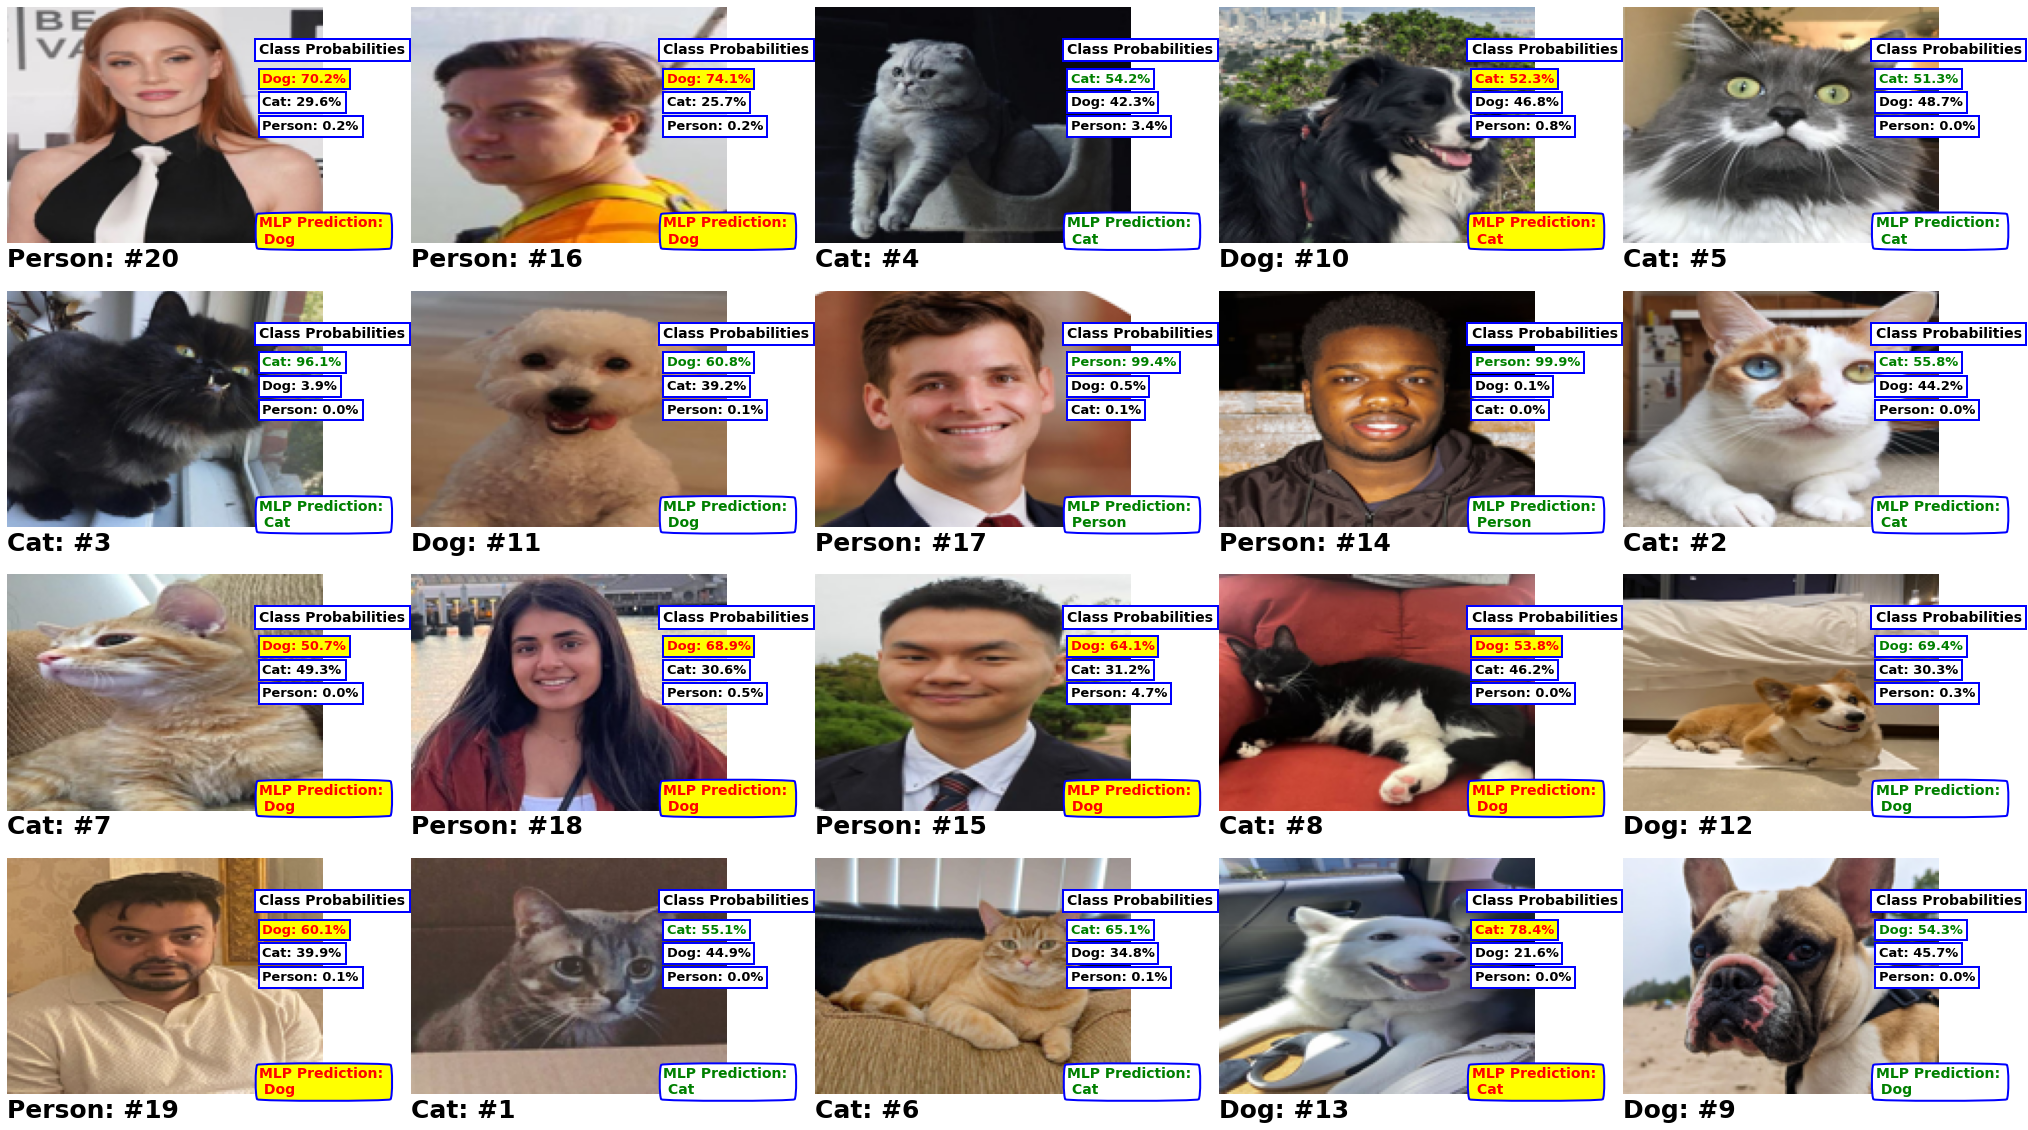

In [426]:
sbp_ind = 0
plt.figure(figsize=(35,20))

for i in shuffle:
    img_path = mlp_preds['image_path'][i]
    pred = str.capitalize(mlp_preds['ModelPrediction'][i])
    actual = str.capitalize(mlp_preds['category'][i])
    header = "{}: #{}".format(str.capitalize(mlp_preds['category'][i]),str(i + 1))
    proba_dict = {'Cat':mlp_preds['Cat_Proba'][i], 'Dog':mlp_preds['Dog_Proba'][i],'Person':mlp_preds['Person_Proba'][i]}
    proba_df = pd.DataFrame(proba_dict.items(),columns=['class_','value']).sort_values('value',ascending=False).reset_index()

    ax = plt.subplot(4, 5, sbp_ind+1)
    sbp_ind = sbp_ind + 1
    ax.axis('off')
    img = Image.open(img_path).resize(size=(160,120))
    plt.imshow(img)
    ax.text(0, -0.1,header, transform=ax.transAxes, size=25,color='black', weight='bold')
    ax.text(0.8, 0.8,"Class Probabilities".format(), 
                    transform=ax.transAxes, size=14,color='Black', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


    if pred == actual:
        t = ax.text(0.8, 0,"MLP Prediction: \n {}".format(pred), 
                    transform=ax.transAxes, size=14,color='green', 
                    weight='bold',bbox=dict(boxstyle="round4,pad=0.3", fc="white", ec="b", lw=2))
        ax.text(0.81, 0.68,"{}: {:.1f}%".format(proba_df['class_'][0],proba_df['value'][0]*100), 
                    transform=ax.transAxes, size=13,color='green', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
        ax.text(0.81, 0.58,"{}: {:.1f}%".format(proba_df['class_'][1],proba_df['value'][1]*100), 
                    transform=ax.transAxes, size=13,color='black', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
        ax.text(0.81, 0.48,"{}: {:.1f}%".format(proba_df['class_'][2],proba_df['value'][2]*100), 
                    transform=ax.transAxes, size=13,color='black', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
    else:
        ax.text(0.8, 0,"MLP Prediction: \n {}".format(pred), 
                    transform=ax.transAxes, size=14,color='red', 
                    weight='bold',bbox=dict(boxstyle="round4,pad=0.3", fc="yellow", ec="b", lw=2))
        ax.text(0.81, 0.68,"{}: {:.1f}%".format(proba_df['class_'][0],proba_df['value'][0]*100), 
                    transform=ax.transAxes, size=13,color='red', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="yellow", ec="b", lw=2))
        ax.text(0.81, 0.58,"{}: {:.1f}%".format(proba_df['class_'][1],proba_df['value'][1]*100), 
                    transform=ax.transAxes, size=13,color='black', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
        ax.text(0.81, 0.48,"{}: {:.1f}%".format(proba_df['class_'][2],proba_df['value'][2]*100), 
                    transform=ax.transAxes, size=13,color='black', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

Predictions with Basic CNN

In [427]:
cnn_classpreds = np.argmax(CNN_basic.predict(X_), axis=1)
print("Accuracy Score: {}%".format(round(accuracy_score(cnn_classpreds,friend_classes_enc),4)*100))
cnn_preds = PredictionProcessesor(CNN_basic)
cnn_preds

Accuracy Score: 45.0%


Id                                         image_path category  \
0    1  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
1    2  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
2    3  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
3    4  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
4    5  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
5    6  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
6    7  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
7    8  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
8    9  C:\Users\Young Harambe\Documents\USC MSBA Docu...      dog   
9   10  C:\Users\Young Harambe\Documents\USC MSBA Docu...      dog   
10  11  C:\Users\Young Harambe\Documents\USC MSBA Docu...      dog   
11  12  C:\Users\Young Harambe\Documents\USC MSBA Docu...      dog   
12  13  C:\Users\Young Harambe\Documents\USC MSBA Docu...      dog   
13  14  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
14  15  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
15  16  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
16  17  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
17  18  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
18  19  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
19  20  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   

   ModelPrediction ActualCategory  Cat_Proba  Dog_Proba  Person_Proba  \
0              cat            cat      0.905      0.095         0.000   
1              dog            cat      0.075      0.918         0.007   
2              cat            cat      0.999      0.001         0.000   
3              dog            cat      0.163      0.833         0.004   
4              dog            cat      0.040      0.959         0.000   
5              dog            cat      0.366      0.631         0.003   
6              dog            cat      0.470      0.530         0.000   
7              dog            cat      0.120      0.880         0.000   
8              dog            dog      0.020      0.980         0.000   
9              cat            dog      0.571      0.429         0.000   
10             dog            dog      0.128      0.871         0.001   
11             dog            dog      0.300      0.700         0.000   
12             dog            dog      0.169      0.830         0.001   
13          person         person      0.002      0.112         0.887   
14          person         person      0.000      0.006         0.994   
15             cat         person      0.572      0.419         0.009   
16          person         person      0.000      0.000         1.000   
17             dog         person      0.011      0.989         0.000   
18             dog         person      0.460      0.540         0.000   
19             dog         person      0.009      0.990         0.000   

    PredictionAccuracy  
0                    1  
1                    0  
2                    1  
3                    0  
4                    0  
5                    0  
6                    0  
7                    0  
8                    1  
9                    0  
10                   1  
11                   1  
12                   1  
13                   1  
14                   1  
15                   0  
16                   1  
17                   0  
18                   0  
19                   0

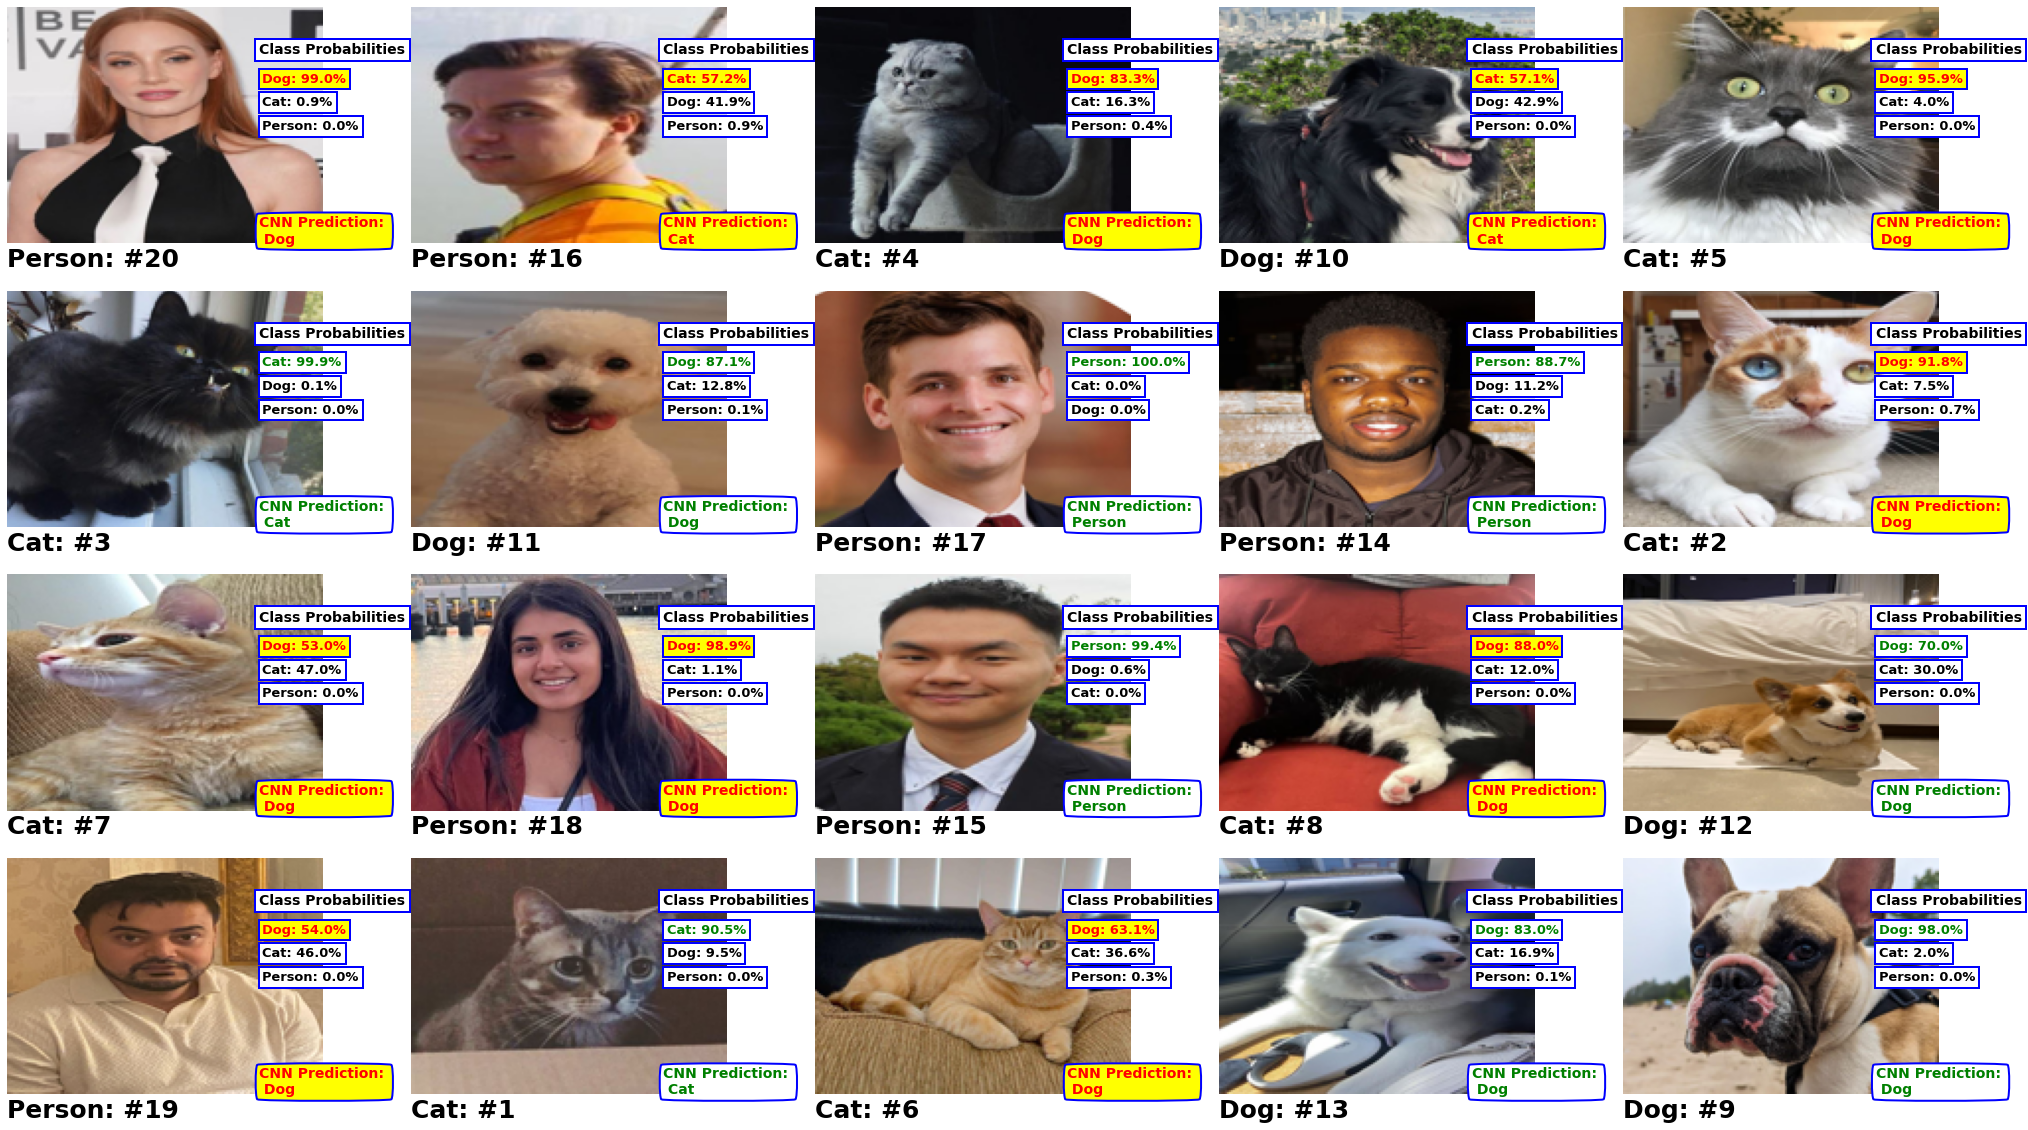

In [428]:
sbp_ind = 0
plt.figure(figsize=(35,20))

for i in shuffle:
    img_path = cnn_preds['image_path'][i]
    pred = str.capitalize(cnn_preds['ModelPrediction'][i])
    actual = str.capitalize(cnn_preds['category'][i])
    header = "{}: #{}".format(str.capitalize(cnn_preds['category'][i]),str(i + 1))
    proba_dict = {'Cat':cnn_preds['Cat_Proba'][i], 'Dog':cnn_preds['Dog_Proba'][i],'Person':cnn_preds['Person_Proba'][i]}
    proba_df = pd.DataFrame(proba_dict.items(),columns=['class_','value']).sort_values('value',ascending=False).reset_index()

    ax = plt.subplot(4, 5, sbp_ind+1)
    sbp_ind = sbp_ind + 1
    ax.axis('off')
    img = Image.open(img_path).resize(size=(160,120))
    plt.imshow(img)
    ax.text(0, -0.1,header, transform=ax.transAxes, size=25,color='black', weight='bold')
    ax.text(0.8, 0.8,"Class Probabilities".format(), 
                    transform=ax.transAxes, size=14,color='Black', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


    if pred == actual:
        t = ax.text(0.8, 0,"CNN Prediction: \n {}".format(pred), 
                    transform=ax.transAxes, size=14,color='green', 
                    weight='bold',bbox=dict(boxstyle="round4,pad=0.3", fc="white", ec="b", lw=2))
        ax.text(0.81, 0.68,"{}: {:.1f}%".format(proba_df['class_'][0],proba_df['value'][0]*100), 
                    transform=ax.transAxes, size=13,color='green', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
        ax.text(0.81, 0.58,"{}: {:.1f}%".format(proba_df['class_'][1],proba_df['value'][1]*100), 
                    transform=ax.transAxes, size=13,color='black', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
        ax.text(0.81, 0.48,"{}: {:.1f}%".format(proba_df['class_'][2],proba_df['value'][2]*100), 
                    transform=ax.transAxes, size=13,color='black', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
    else:
        ax.text(0.8, 0,"CNN Prediction: \n {}".format(pred), 
                    transform=ax.transAxes, size=14,color='red', 
                    weight='bold',bbox=dict(boxstyle="round4,pad=0.3", fc="yellow", ec="b", lw=2))
        ax.text(0.81, 0.68,"{}: {:.1f}%".format(proba_df['class_'][0],proba_df['value'][0]*100), 
                    transform=ax.transAxes, size=13,color='red', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="yellow", ec="b", lw=2))
        ax.text(0.81, 0.58,"{}: {:.1f}%".format(proba_df['class_'][1],proba_df['value'][1]*100), 
                    transform=ax.transAxes, size=13,color='black', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
        ax.text(0.81, 0.48,"{}: {:.1f}%".format(proba_df['class_'][2],proba_df['value'][2]*100), 
                    transform=ax.transAxes, size=13,color='black', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

Predictions with AlexNet

In [429]:
AlexNet_classpreds = np.argmax(AlexNet.predict(X_), axis=1)
print("Accuracy Score: {}%".format(round(accuracy_score(AlexNet_classpreds ,friend_classes_enc),4)*100))

AlexNet_preds  = PredictionProcessesor(AlexNet)
AlexNet_preds

Accuracy Score: 35.0%


Id                                         image_path category  \
0    1  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
1    2  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
2    3  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
3    4  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
4    5  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
5    6  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
6    7  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
7    8  C:\Users\Young Harambe\Documents\USC MSBA Docu...      cat   
8    9  C:\Users\Young Harambe\Documents\USC MSBA Docu...      dog   
9   10  C:\Users\Young Harambe\Documents\USC MSBA Docu...      dog   
10  11  C:\Users\Young Harambe\Documents\USC MSBA Docu...      dog   
11  12  C:\Users\Young Harambe\Documents\USC MSBA Docu...      dog   
12  13  C:\Users\Young Harambe\Documents\USC MSBA Docu...      dog   
13  14  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
14  15  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
15  16  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
16  17  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
17  18  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
18  19  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   
19  20  C:\Users\Young Harambe\Documents\USC MSBA Docu...   person   

   ModelPrediction ActualCategory  Cat_Proba  Dog_Proba  Person_Proba  \
0              dog            cat      0.171      0.828         0.001   
1              cat            cat      0.677      0.322         0.000   
2              cat            cat      0.827      0.173         0.000   
3              dog            cat      0.289      0.711         0.001   
4              dog            cat      0.442      0.558         0.001   
5              dog            cat      0.186      0.813         0.001   
6              dog            cat      0.259      0.740         0.001   
7              dog            cat      0.132      0.867         0.001   
8              dog            dog      0.122      0.877         0.001   
9              cat            dog      0.511      0.488         0.001   
10             dog            dog      0.143      0.854         0.003   
11             dog            dog      0.382      0.617         0.001   
12             cat            dog      0.709      0.291         0.000   
13          person         person      0.000      0.000         0.999   
14             dog         person      0.217      0.730         0.053   
15             dog         person      0.156      0.839         0.005   
16          person         person      0.000      0.000         1.000   
17             dog         person      0.120      0.879         0.001   
18             cat         person      0.699      0.301         0.000   
19             dog         person      0.206      0.764         0.030   

    PredictionAccuracy  
0                    0  
1                    1  
2                    1  
3                    0  
4                    0  
5                    0  
6                    0  
7                    0  
8                    1  
9                    0  
10                   1  
11                   1  
12                   0  
13                   1  
14                   0  
15                   0  
16                   1  
17                   0  
18                   0  
19                   0

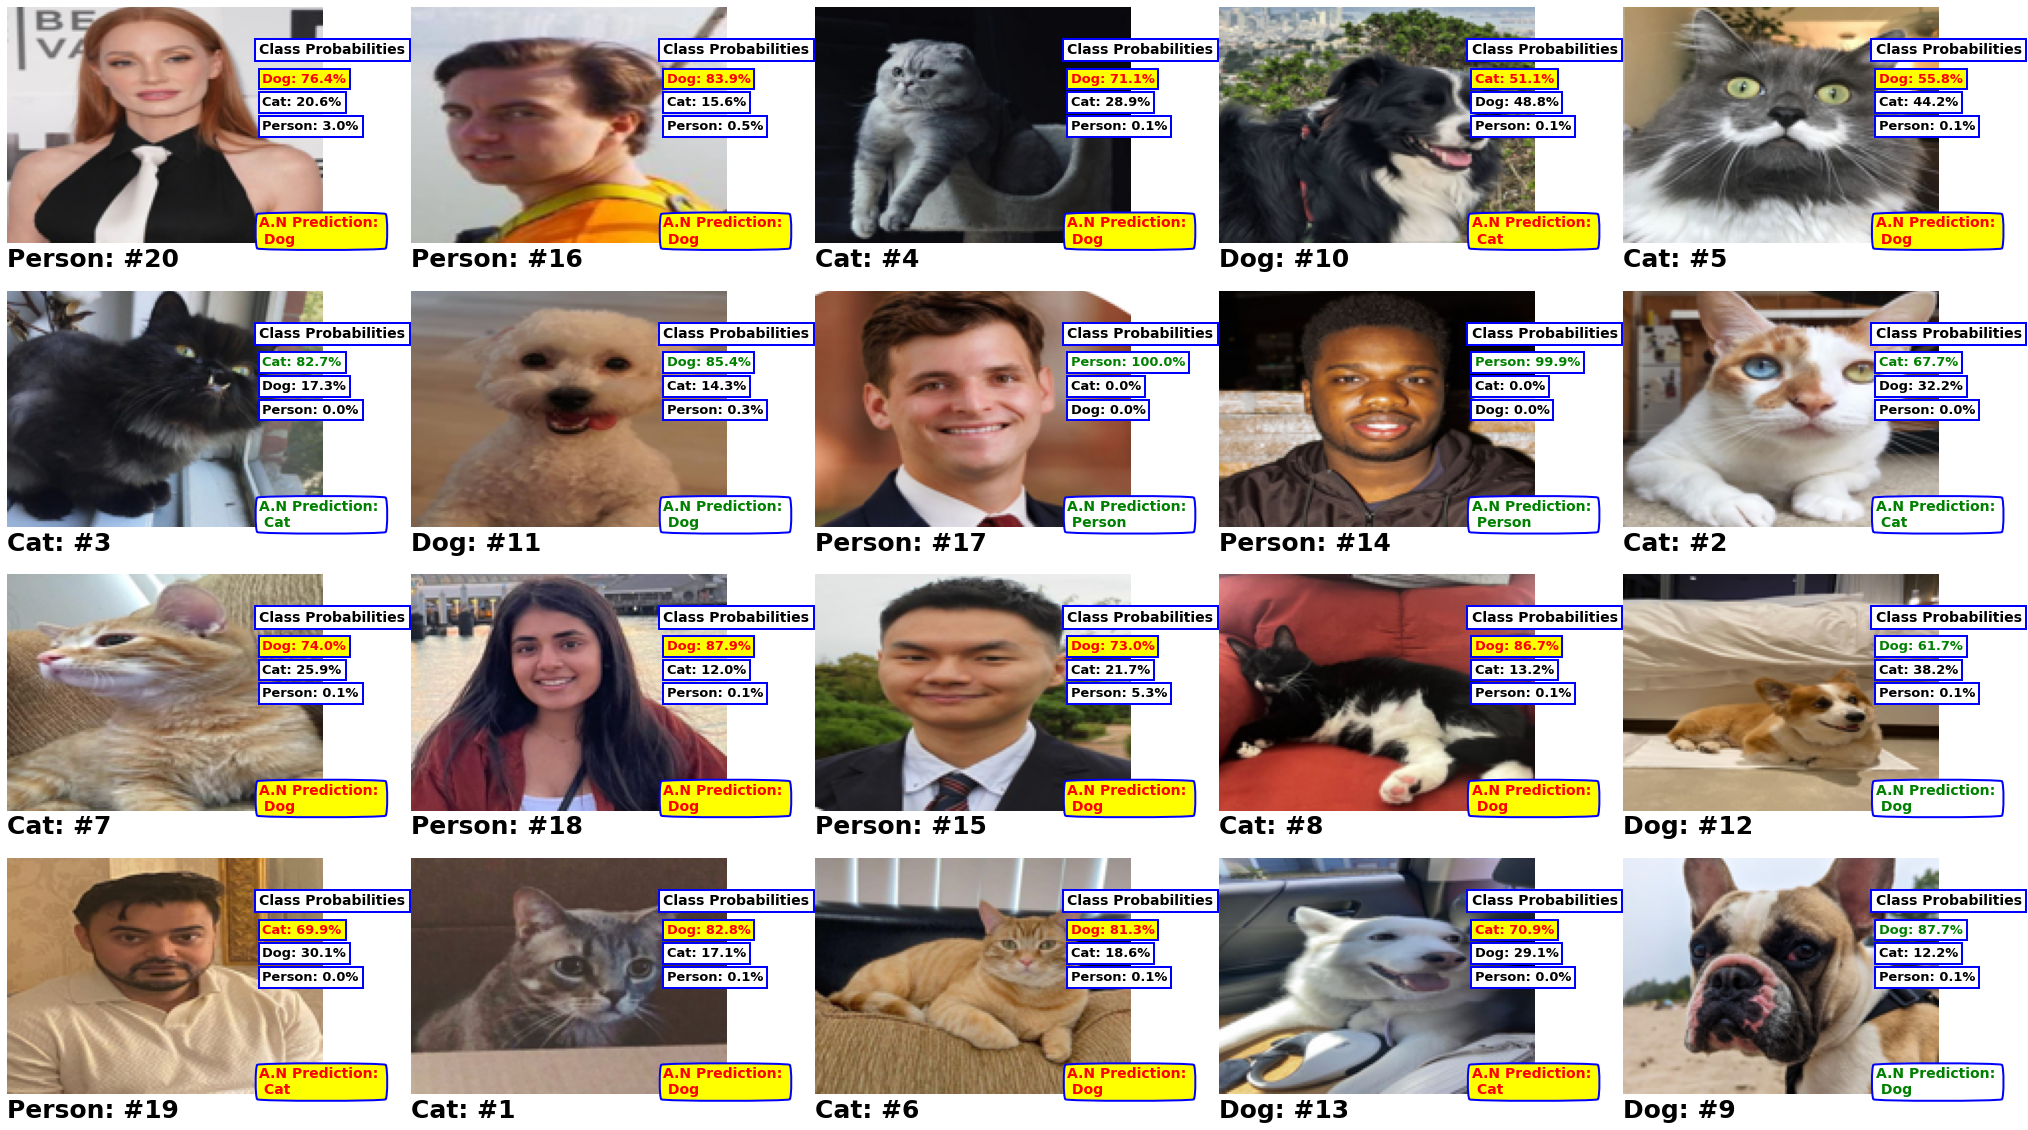

In [430]:
sbp_ind = 0
plt.figure(figsize=(35,20))

for i in shuffle:
    img_path = AlexNet_preds['image_path'][i]
    pred = str.capitalize(AlexNet_preds['ModelPrediction'][i])
    actual = str.capitalize(AlexNet_preds['category'][i])
    header = "{}: #{}".format(str.capitalize(AlexNet_preds['category'][i]),str(i + 1))
    proba_dict = {'Cat':AlexNet_preds['Cat_Proba'][i], 'Dog':AlexNet_preds['Dog_Proba'][i],'Person':AlexNet_preds['Person_Proba'][i]}
    proba_df = pd.DataFrame(proba_dict.items(),columns=['class_','value']).sort_values('value',ascending=False).reset_index()

    ax = plt.subplot(4, 5, sbp_ind+1)
    sbp_ind = sbp_ind + 1
    ax.axis('off')
    img = Image.open(img_path).resize(size=(160,120))
    plt.imshow(img)
    ax.text(0, -0.1,header, transform=ax.transAxes, size=25,color='black', weight='bold')
    ax.text(0.8, 0.8,"Class Probabilities".format(), 
                    transform=ax.transAxes, size=14,color='Black', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


    if pred == actual:
        t = ax.text(0.8, 0,"A.N Prediction: \n {}".format(pred), 
                    transform=ax.transAxes, size=14,color='green', 
                    weight='bold',bbox=dict(boxstyle="round4,pad=0.3", fc="white", ec="b", lw=2))
        ax.text(0.81, 0.68,"{}: {:.1f}%".format(proba_df['class_'][0],proba_df['value'][0]*100), 
                    transform=ax.transAxes, size=13,color='green', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
        ax.text(0.81, 0.58,"{}: {:.1f}%".format(proba_df['class_'][1],proba_df['value'][1]*100), 
                    transform=ax.transAxes, size=13,color='black', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
        ax.text(0.81, 0.48,"{}: {:.1f}%".format(proba_df['class_'][2],proba_df['value'][2]*100), 
                    transform=ax.transAxes, size=13,color='black', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
    else:
        ax.text(0.8, 0,"A.N Prediction: \n {}".format(pred), 
                    transform=ax.transAxes, size=14,color='red', 
                    weight='bold',bbox=dict(boxstyle="round4,pad=0.3", fc="yellow", ec="b", lw=2))
        ax.text(0.81, 0.68,"{}: {:.1f}%".format(proba_df['class_'][0],proba_df['value'][0]*100), 
                    transform=ax.transAxes, size=13,color='red', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="yellow", ec="b", lw=2))
        ax.text(0.81, 0.58,"{}: {:.1f}%".format(proba_df['class_'][1],proba_df['value'][1]*100), 
                    transform=ax.transAxes, size=13,color='black', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
        ax.text(0.81, 0.48,"{}: {:.1f}%".format(proba_df['class_'][2],proba_df['value'][2]*100), 
                    transform=ax.transAxes, size=13,color='black', 
                    weight='bold',bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))